# Building Neural Network Model

In [1]:
#Import Libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = os.path.join("..","Course Work")

In [3]:
#read the marketing campaing csv file in to a dataframe
nnMark = pd.read_csv(os.path.join(filepath,"ModifiedMarketingClean.csv"))

In [4]:
nnMark.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI,COMMENTS
0,101501,0,41,18,3,12,Prof.,3,0,1,1,1,1,1,0,0,Shopping at your store is a hassle. I rarely s...
1,101502,1,27,18,3,10,Sales,3,0,1,1,0,1,1,1,0,Affinity card is great. I think it is a hassle...
2,101503,0,20,18,3,11,Cleric.,3,0,1,0,0,1,1,1,0,"I purchased a new computer recently, but the m..."
3,101504,1,45,18,1,10,Exec.,4,1,0,0,1,1,1,0,0,Affinity card is great. I think it is a hassle...
4,101505,1,34,18,3,12,Sales,5,1,1,1,0,1,1,0,0,Why didn't you start a program like this befor...


In [5]:
X = nnMark.iloc[:, 1:9].values
y = nnMark.iloc[:, 8].values

In [6]:
X

array([[0, 41, 18, ..., 'Prof.', 3, 0],
       [1, 27, 18, ..., 'Sales', 3, 0],
       [0, 20, 18, ..., 'Cleric.', 3, 0],
       ...,
       [1, 53, 18, ..., 'Exec.', 4, 1],
       [1, 55, 18, ..., 'Cleric.', 4, 1],
       [0, 40, 18, ..., 'Cleric.', 3, 0]], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 5] = labelencoder_X_1.fit_transform(X[:, 5])

In [8]:
X.shape

(1427, 8)

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
print(keras.__version__)

In [31]:
#Initializing Neural Network
classifier = Sequential()

In [43]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu', input_dim = 8))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=8, units=2, kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=2, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [44]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
X_train.shape

(856, 8)

In [48]:
# Fitting our model 

classifier.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
856/856 [==============================] - 0s 210us/step - loss: 0.5637 - acc: 0.7523
Epoch 2/50
856/856 [==============================] - 0s 174us/step - loss: 0.5630 - acc: 0.7523
Epoch 3/50
856/856 [==============================] - 0s 170us/step - loss: 0.5624 - acc: 0.7523
Epoch 4/50
856/856 [==============================] - 0s 166us/step - loss: 0.5619 - acc: 0.7523
Epoch 5/50
856/856 [==============================] - 0s 165us/step - loss: 0.5615 - acc: 0.7523
Epoch 6/50
856/856 [==============================] - 0s 167us/step - loss: 0.5612 - acc: 0.7523
Epoch 7/50
856/856 [==============================] - 0s 177us/step - loss: 0.5609 - acc: 0.7523
Epoch 8/50
856/856 [==============================] - 0s 170us/step - loss: 0.5607 - acc: 0.7523
Epoch 9/50
856/856 [==============================] - 0s 178us/step - loss: 0.5605 - acc: 0.7523
Epoch 10/50
856/856 [==============================] - 0s 168us/step - loss: 0.5604 - acc: 0.7523
Epoch 11/50
856/856 [========

In [49]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Text(0.5,257.44,'Predicted label')

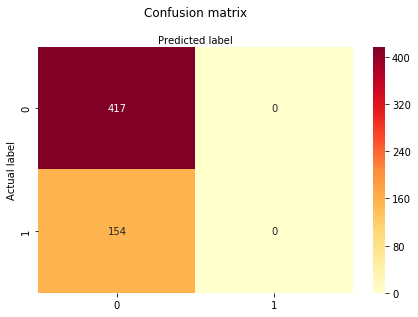

In [50]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns

class_names = [0,1] # name of the target variable 'label' class
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
cm

array([[216,   0],
       [  0,  70]])